In [5]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

x, y = np.meshgrid(np.linspace(0, 5, 10), np.linspace(-5, 5, 20))

def gen_campo(v):

    u = 1

    n = np.sqrt(u ** 2 + v ** 2)

    u, v = u/n, v/n

    plt.quiver(x, y, u, v)
    plt.grid()

def euler(f, x0, x1, y0, h):
    n = int((x1 - x0) / h)
    x = np.linspace(x0, x1, n)
    y = np.zeros(n)
    y[0] = y0

    for i in range(0, n - 1):
        y[i + 1] = y[i] + h * f(x[i], y[i])
    
    return (x, y)


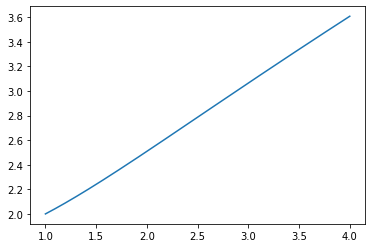

In [21]:
def f(x, y):
    ec = (np.sqrt(3) * x) / y ** 2
    return ec

(x, y) = euler(f, 1, 2, 4, 0.01)
plt.plot(x, y)